In [2]:
### Import packages for authentication

from google.cloud import bigquery
from google.oauth2 import service_account

### Import packages for converting query results into dataframe

import pandas as pd 

## Import packages to create absolute file path &  make code independent of operating system

from pathlib import Path
import os.path

In [6]:
### Authentication 

base_path = Path("__file__").parent
full_path = (base_path / "../data/raw/GoogleBigQuery_key.json").resolve()

credentials = service_account.Credentials.from_service_account_file(os.path.join(full_path))

In [8]:
### Construct a BigQuery client object.

client = bigquery.Client(credentials=credentials, 
project = credentials.project_id)

In [9]:
### Getting overview of Stack Overflow tables

stackoverflow = client.dataset('stackoverflow', project= 'bigquery-public-data')
print([x.table_id for x in client.list_tables(stackoverflow)])

['badges', 'comments', 'post_history', 'post_links', 'posts_answers', 'posts_moderator_nomination', 'posts_orphaned_tag_wiki', 'posts_privilege_wiki', 'posts_questions', 'posts_tag_wiki', 'posts_tag_wiki_excerpt', 'posts_wiki_placeholder', 'stackoverflow_posts', 'tags', 'users', 'votes']


In [6]:
### Make an API request

query = """
SELECT
      pq.score, pq.id as question_id, pa.parent_id as question_id_check, pq.title as question_title, pq.body as question_text, pq.answer_count,
      pq.comment_count, pq.creation_date, pq.tags, pq.view_count, pa.body as answer_text
FROM `bigquery-public-data.stackoverflow.posts_questions` pq
INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` pa ON pq.id = pa.parent_id
WHERE pa.creation_date > "2019-05-30 00:00:00.000 UTC"
"""

dataframe = (
    client.query(query)
    .result()
    .to_dataframe()
)

In [3]:
### Temporary code to quickly open dataset

dataframe = pd.read_csv("/Users/HenriekeMax/Documents/Career_Development/GitHub/FrauenLoop_NLP_Project_2020/data/raw/stackoverflow_raw.csv")

In [6]:
### Display query results

display(dataframe)

,Unnamed: 0,Unnamed: 0.1,score,question_id,question_id_check,question_title,question_text,answer_count,comment_count,creation_date,favorite_count,tags,view_count,answer_text
0,0,0,-2,59318968,59318968,how can i have an logout option in my flutter ...,<p>i have developed an admin app in that i hav...,2,1,2019-12-13 08:47:25.110000+00:00,NaN,firebase|flutter|dart|firebase-authentication,189,<p>replace this line</p>\n\n<pre><code>Navigat...
1,1,1,117,14940660,14940660,What's Mongoose error Cast to ObjectId failed ...,<p>When sending a request to <code>/customers/...,21,0,2013-02-18 16:18:03.700000+00:00,31.0,mongodb|mongoose,166823,"<p>If anyone runs into this, \nwhat solved it ..."
2,2,2,1,43315796,43315796,Angular2- Radio button testing,<p>I'm trying to test an HTML radio button wit...,2,7,2017-04-10 05:49:49.340000+00:00,NaN,angular|karma-jasmine|angular2-testing,2018,<p>id attributes do need to be unique. To mak...
3,3,3,0,57089771,57089771,Filter out records in specified day of week in...,<p>I have inner query which is returning a spe...,2,7,2019-07-18 08:02:50.267000+00:00,1.0,sql|database|postgresql|date|inner-query,124,"<pre><code>SELECT id, to_char(markupdate, 'Day..."
4,4,4,1,57429407,57429407,Serializing a map getting an additional empty ...,<p>I am trying to serialize an object of <code...,1,8,2019-08-09 11:45:44.507000+00:00,NaN,c++|qt,53,<p>You need to test the stream <em>after</em> ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463027,2463027,2463027,1,60836246,60836246,Standard library ABI compatibility,<p>Suppose we have a shared library which acce...,2,0,2020-03-24 17:28:38.407000+00:00,NaN,linux|gcc|g++,41,<p>ABIs in practice are not linked to the stan...
2463028,2463028,2463028,-1,59485298,59485298,Why view.height is 3 times bigger than actual ...,<p>I have an ImageView with height set to 120d...,5,0,2019-12-26 07:31:51.597000+00:00,NaN,android|xml|kotlin|view,72,<p>Because in xml file you have given size in ...
2463029,2463029,2463029,-1,57494584,57494584,C# MVC Ajax call returns undefined,"<p>I am new to ajax, am trying to send usernam...",2,3,2019-08-14 12:21:15.717000+00:00,NaN,javascript|c#|ajax|model-view-controller,131,"<p>Specific to your case, you can refer to thi..."
2463030,2463030,2463030,1,57648623,57648623,How to create an expandeble multible imagebutt...,<p>I want to have multiple images displayed in...,1,4,2019-08-25 18:20:28.320000+00:00,0.0,c#|xamarin.forms,52,<p>I solved the problem by placing the grid in...


In [7]:
### Check for null values

dataframe.isnull().values.any()
dataframe.isnull().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
score                      0
question_id                0
question_id_check          0
question_title             0
question_text              0
answer_count               0
comment_count              0
creation_date              0
favorite_count       1972454
tags                       1
view_count                 0
answer_text                0
dtype: int64

In [4]:
### Dropping null value from tags column, given that it has only one missing value

dataframe = dataframe[dataframe['tags'].notnull()]
dataframe = dataframe.reset_index()[dataframe.columns]

In [8]:
### Summarization of variables for only numeric

dataframe.describe()

# mean score is 7.6 while 50% percentile / median score is 0.

,Unnamed: 0,Unnamed: 0.1,score,question_id,question_id_check,answer_count,comment_count,favorite_count,view_count
count,2.463032e+06,2.463032e+06,2.463032e+06,2.463032e+06,2.463032e+06,2.463032e+06,2.463032e+06,490578.000000,2.463032e+06
mean,1.231516e+06,1.231516e+06,7.616748e+00,5.524083e+07,5.524083e+07,2.386682e+00,1.992953e+00,10.519249,7.561019e+03
std,7.110162e+05,7.110162e+05,9.774564e+01,1.147648e+07,1.147648e+07,3.070207e+00,2.692686e+00,70.801543,7.230365e+04
min,0.000000e+00,0.000000e+00,-6.000000e+01,9.000000e+00,9.000000e+00,1.000000e+00,0.000000e+00,0.000000,2.000000e+00
25%,6.157578e+05,6.157578e+05,0.000000e+00,5.695817e+07,5.695817e+07,1.000000e+00,0.000000e+00,1.000000,3.900000e+01
50%,1.231516e+06,1.231516e+06,0.000000e+00,5.861256e+07,5.861256e+07,2.000000e+00,1.000000e+00,1.000000,6.400000e+01
75%,1.847273e+06,1.847273e+06,1.000000e+00,6.030418e+07,6.030418e+07,3.000000e+00,3.000000e+00,4.000000,2.150000e+02
max,2.463031e+06,2.463031e+06,2.442600e+04,6.211193e+07,6.211193e+07,1.080000e+02,7.400000e+01,11010.000000,8.606901e+06


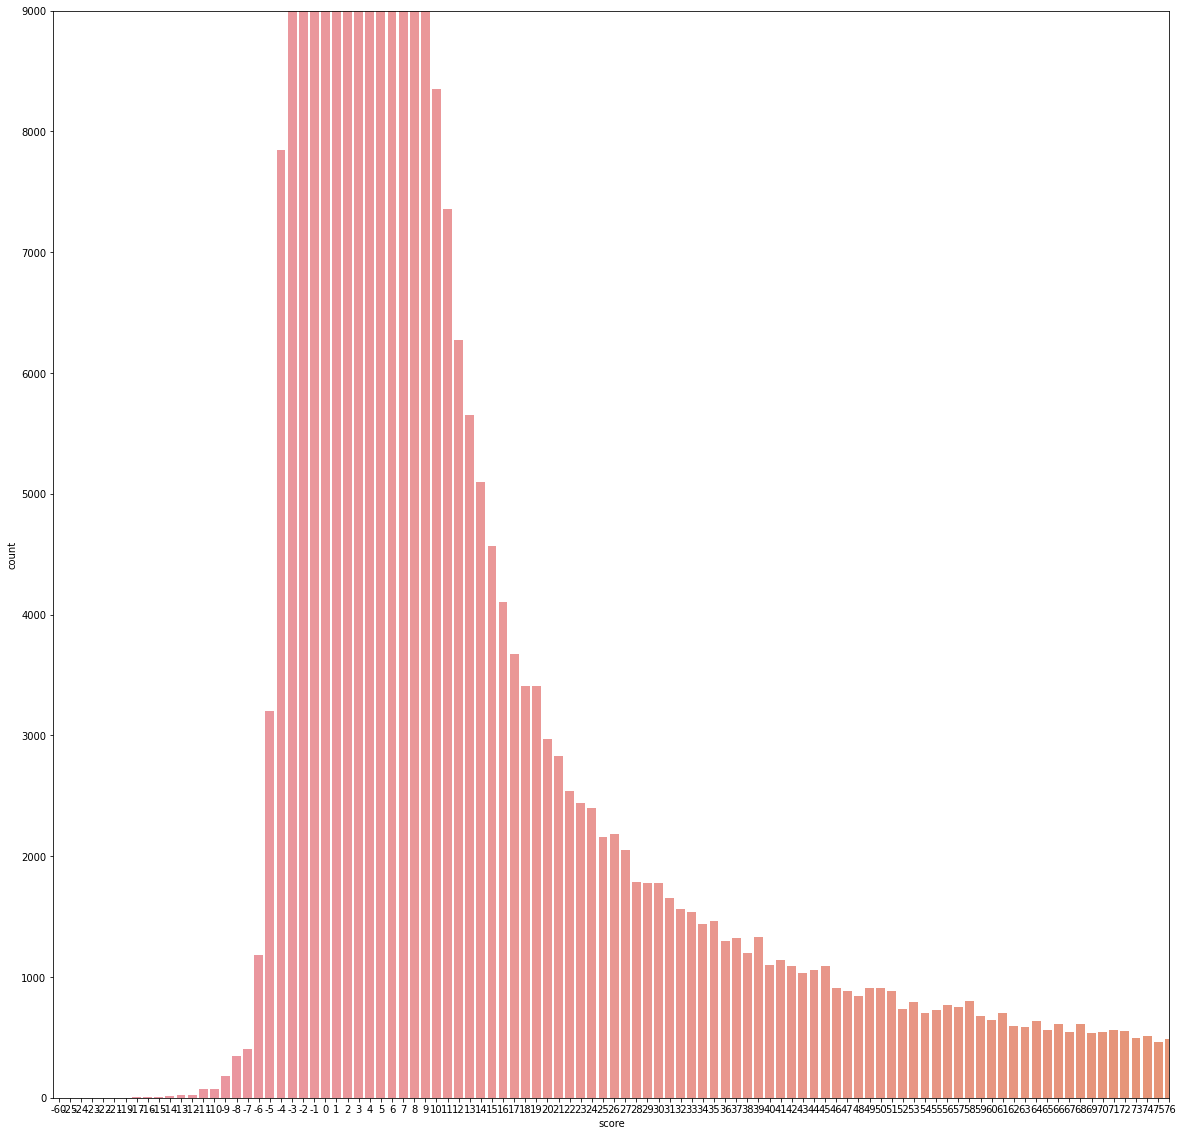

In [10]:
#### Histogram of distribution of outcome column "score"

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

f, ax = plt.subplots(figsize=(20,20))
sns.countplot(x='score', data=dataframe)
plt.xlim(None, 100) 
plt.ylim(0, 9000) 
plt.show()

In [15]:
dataframe['score'].value_counts() # .sort_index()

 0       1167343
 1        497483
 2        190425
-1        151273
 3         84687
          ...   
 1143          1
 1139          1
 1132          1
 1120          1
 689           1
Name: score, Length: 1612, dtype: int64

In [16]:
### Assign category (bad, good, great) for score

score_bucketing = lambda x: 'bad' if x < 0 else 'good' if (x >= 1 and x <= 10) else 'great' if x >= 11 else None

dataframe['score_cat'] = dataframe['score'].apply(score_bucketing)

In [17]:
print("{} unique values in column".format('score_cat'))
print("{}".format(dataframe['score_cat'].unique()),"\n")

score_cat unique values in column
['bad' 'great' 'good' None] 



In [12]:
### Assign binary category (bad, good) for score

score_bucketing_binary = lambda x: 'bad' if x < 0 else 'good' if x >= 1 else None

dataframe['score_cat_binary'] = dataframe['score'].apply(score_bucketing_binary)

In [13]:
print("{} unique values in column".format('score_cat_binary'))
print("{}".format(dataframe['score_cat_binary'].unique()),"\n")

score_cat_binary unique values in column
['bad' 'good' None] 



In [6]:
### Look at the data to understand the type and missing values

print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463031 entries, 0 to 2463030
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Unnamed: 0.1       int64  
 2   Unnamed: 0.1.1     int64  
 3   score              int64  
 4   question_id        int64  
 5   question_id_check  int64  
 6   question_title     object 
 7   question_text      object 
 8   answer_count       int64  
 9   comment_count      int64  
 10  creation_date      object 
 11  favorite_count     float64
 12  tags               object 
 13  view_count         int64  
 14  answer_text        object 
 15  score_cat          object 
 16  score_cat_binary   object 
dtypes: float64(1), int64(9), object(7)
memory usage: 319.5+ MB
None


In [8]:
display(dataframe)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,score,question_id,question_id_check,question_title,question_text,answer_count,comment_count,creation_date,favorite_count,tags,view_count,answer_text,score_cat,score_cat_binary
0,0,0,0,-2,59318968,59318968,how can i have an logout option in my flutter ...,<p>i have developed an admin app in that i hav...,2,1,2019-12-13 08:47:25.110000+00:00,NaN,firebase|flutter|dart|firebase-authentication,189,<p>replace this line</p>\n\n<pre><code>Navigat...,bad,bad
1,1,1,1,117,14940660,14940660,What's Mongoose error Cast to ObjectId failed ...,<p>When sending a request to <code>/customers/...,21,0,2013-02-18 16:18:03.700000+00:00,31.0,mongodb|mongoose,166823,"<p>If anyone runs into this, \nwhat solved it ...",great,good
2,2,2,2,1,43315796,43315796,Angular2- Radio button testing,<p>I'm trying to test an HTML radio button wit...,2,7,2017-04-10 05:49:49.340000+00:00,NaN,angular|karma-jasmine|angular2-testing,2018,<p>id attributes do need to be unique. To mak...,good,good
3,3,3,3,0,57089771,57089771,Filter out records in specified day of week in...,<p>I have inner query which is returning a spe...,2,7,2019-07-18 08:02:50.267000+00:00,1.0,sql|database|postgresql|date|inner-query,124,"<pre><code>SELECT id, to_char(markupdate, 'Day...",NaN,None
4,4,4,4,1,57429407,57429407,Serializing a map getting an additional empty ...,<p>I am trying to serialize an object of <code...,1,8,2019-08-09 11:45:44.507000+00:00,NaN,c++|qt,53,<p>You need to test the stream <em>after</em> ...,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463026,2463026,2463027,2463027,1,60836246,60836246,Standard library ABI compatibility,<p>Suppose we have a shared library which acce...,2,0,2020-03-24 17:28:38.407000+00:00,NaN,linux|gcc|g++,41,<p>ABIs in practice are not linked to the stan...,good,good
2463027,2463027,2463028,2463028,-1,59485298,59485298,Why view.height is 3 times bigger than actual ...,<p>I have an ImageView with height set to 120d...,5,0,2019-12-26 07:31:51.597000+00:00,NaN,android|xml|kotlin|view,72,<p>Because in xml file you have given size in ...,bad,bad
2463028,2463028,2463029,2463029,-1,57494584,57494584,C# MVC Ajax call returns undefined,"<p>I am new to ajax, am trying to send usernam...",2,3,2019-08-14 12:21:15.717000+00:00,NaN,javascript|c#|ajax|model-view-controller,131,"<p>Specific to your case, you can refer to thi...",bad,bad
2463029,2463029,2463030,2463030,1,57648623,57648623,How to create an expandeble multible imagebutt...,<p>I want to have multiple images displayed in...,1,4,2019-08-25 18:20:28.320000+00:00,0.0,c#|xamarin.forms,52,<p>I solved the problem by placing the grid in...,good,good


In [9]:
### Save dataframe to a csv file

base_path = Path("__file__").parent
full_path = (base_path / "../data/raw/stackoverflow_raw.csv").resolve()

dataframe.to_csv(os.path.join(full_path))

In [21]:
### Sample equal amounts of data rows for "bad", "good" and "great" answers from main dataset

stackoverflow = dataframe.groupby('score_cat', group_keys=False).apply(lambda x: x.sample(n=10000, random_state = 1)).reset_index(drop=True)

In [22]:
### Check if equal sampling of "bad", "good", and "great" answers was successful

stackoverflow.score_cat.value_counts()

great    10000
good     10000
bad      10000
Name: score_cat, dtype: int64

In [23]:
### Save sample of dataframe to a csv file

base_path = Path("__file__").parent
full_path = (base_path / "../data/raw/stackoverflow_raw_sample.csv").resolve()
stackoverflow.to_csv(os.path.join(full_path))

In [15]:
### Sample equal amounts of data rows for "bad" and "good" answers from main dataset

stackoverflow_binary = dataframe.groupby('score_cat_binary', group_keys=False).apply(lambda x: x.sample(n=15000, random_state = 1)).reset_index(drop=True)

In [16]:
### Check if equal sampling of "bad" and "good" answers was successful

stackoverflow_binary.score_cat_binary.value_counts()

bad     15000
good    15000
Name: score_cat_binary, dtype: int64

In [17]:
### Save sample of dataframe to a csv file

base_path = Path("__file__").parent
full_path = (base_path / "../data/raw/stackoverflow_raw_sample_binary.csv").resolve()
stackoverflow_binary.to_csv(os.path.join(full_path))